## Time distribution characteristics of rumor refuting posts

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:\\D盘\\COVID-19 rumors-debunking\\data_clean_classification\\data\\original_data.csv')

C:\Users\qqcom\AppData\Local\Temp\ipykernel_5644\842053053.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\D盘\\COVID-19 rumors-debunking\\data_clean_classification\\data\\original_data.csv')


In [3]:
df.columns

Index(['博文ID', '博文链接', '博文内容', '博文关联话题', '博文发布时间', '博文图片链接', '博文转发量', '博文评论量',
       '博文点赞量', '博主ID', '博主名称', '博主链接', '博主图像', '博主简介', '博主关注数', '博主粉丝数',
       '博主博文数', '博主性别', '博主认证信息', '原文博文ID', '原文博文链接', '原文博文内容', '原文博文关联话题',
       '原文博文发布时间', '原文博文图片链接', '原文博文转发量', '原文博文评论量', '原文博文点赞量', '原文博主ID',
       '原文博主名称', '原文博主链接', '原文博主图像', '原文博主简介', '原文博主关注数', '原文博主粉丝数', '原文博主博文数',
       '原文博主性别', '原文博主认证信息', 'pred_classify', 'cut'],
      dtype='object')

In [4]:
df_original_trend = df[['原文博文内容', '原文博文发布时间', '原文博文转发量', '原文博文评论量', '原文博文点赞量']]
df_original_trend.shape

(88165, 5)

In [5]:
df_original_unique = df_original_trend.drop_duplicates(subset='原文博文内容')
df_original_unique.shape

(15337, 5)

In [6]:
df_original_unique.iloc[10268]['原文博文转发量']

'72'

In [7]:
# Convert "100万+" to "1000000"
df_original_unique['原文博文转发量'] = df_original_unique['原文博文转发量'].str.replace('100万+', '100万').str.replace('万', '').astype(float)*10000
df_original_unique['原文博文评论量'] = df_original_unique['原文博文评论量'].str.replace('100万+', '100万').str.replace('万', '').astype(float)*10000

C:\Users\qqcom\AppData\Local\Temp\ipykernel_5644\34604962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_unique['原文博文转发量'] = df_original_unique['原文博文转发量'].str.replace('100万+', '100万').str.replace('万', '').astype(float)*10000
C:\Users\qqcom\AppData\Local\Temp\ipykernel_5644\34604962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_unique['原文博文评论量'] = df_original_unique['原文博文评论量'].str.replace('100万+', '100万').str.replace('万', '').astype(float)*10000


In [8]:
# Convert time type
df_original_unique['原文博文发布时间'] = pd.to_datetime(df_original_unique['原文博文发布时间']) 
df_original_unique['原文博文发布时间'].dtypes

# Set the 'time' column to the index of the DataFrame
df_original_unique.set_index('原文博文发布时间', inplace=True) 

C:\Users\qqcom\AppData\Local\Temp\ipykernel_5644\1694723080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_unique['原文博文发布时间'] = pd.to_datetime(df_original_unique['原文博文发布时间'])


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

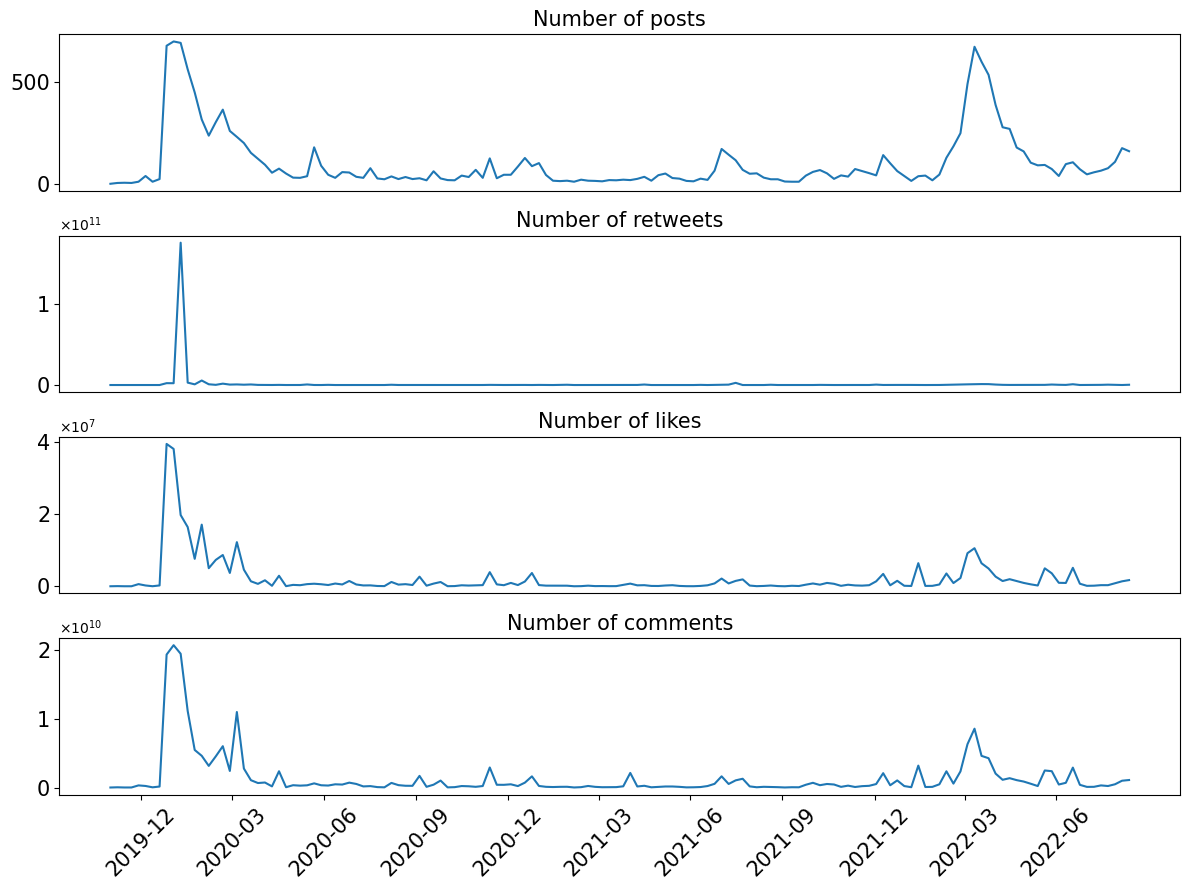

In [27]:
counts = df_original_unique.resample('W').size()
retweets = df_original_unique.resample('W').sum()['原文博文转发量']
likes = df_original_unique.resample('W').sum()['原文博文点赞量']
comments = df_original_unique.resample('W').sum()['原文博文评论量']

fig, axes = plt.subplots(4, 1, figsize=(12, 9))

# Generate tick values
x = pd.date_range(start=df_original_unique.index.min(), end=df_original_unique.index.max(), freq='M')

# Graph post count trends
axes[0].plot(counts.index, counts)
axes[0].set_title('Number of posts', fontsize=15)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].set_xticks([])  # 不显示刻度
#axes[0].set_xticklabels(x.strftime('%Y-%m'), rotation='vertical')  # Set tick labels

# Graph retweets trends
axes[1].plot(retweets.index, retweets)
axes[1].set_title('Number of retweets', fontsize=15)
axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
axes[1].tick_params(axis='both', labelsize=15)
axes[1].set_xticks([])  
#axes[1].set_xticklabels(x.strftime('%Y-%m'), rotation='vertical')

# Graph likes trends
axes[2].plot(likes.index,likes)
axes[2].set_title('Number of likes', fontsize=15)
axes[2].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
axes[2].tick_params(axis='both', labelsize=15)
axes[2].set_xticks([])  
#axes[2].set_xticklabels(x.strftime('%Y-%m'), rotation='vertical')

# Graph comments trends
axes[3].plot(comments.index, comments)
axes[3].set_title('Number of comments', fontsize=15)
axes[3].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
axes[3].tick_params(axis='both', labelsize=15)
axes[3].set_xticks(x[::3]) 
axes[3].set_xticklabels(x[::3].strftime('%Y-%m'), rotation=45)

plt.tight_layout()
plt.savefig('trend.png', dpi=200)
plt.show()